In [1]:
import import_ipynb
import Covid_analysis

1. Bar Chart of Top 10 Countries by Confirmed Cases
2. Pie Chart of Global Death Distribution by Region
3. Line Chart comparing Confirmed and Deaths for Top 5 Countries
4. Scatter Plot of Confirmed Cases vs Recovered Cases
5. Histogram of Death Counts across all Regions
6. Stacked Bar Chart of Confirmed, Deaths, and Recovered for 5 Selected Countries
7. Box Plot of Confirmed Cases across Regions
8. Trend Line: Plot Confirmed cases for India vs another chosen country (side by side
comparison).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('country_wise_latest.csv')
df = pd.DataFrame(data)
print(df.head())


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

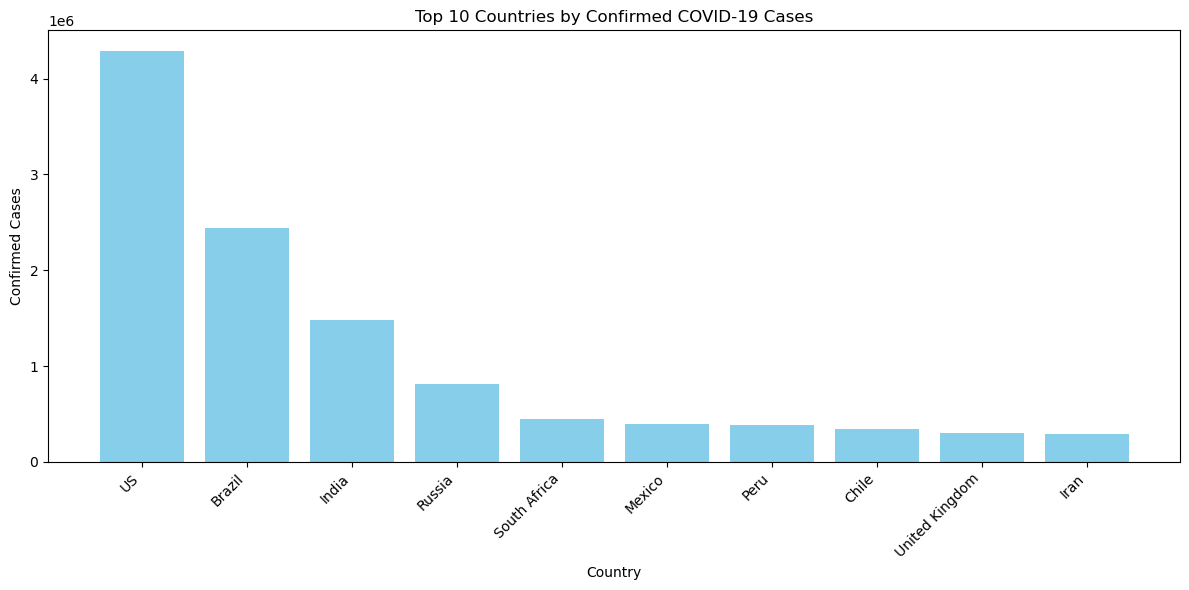

In [5]:
top10 = df.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top10['Country/Region'], top10['Confirmed'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.tight_layout()
plt.show()

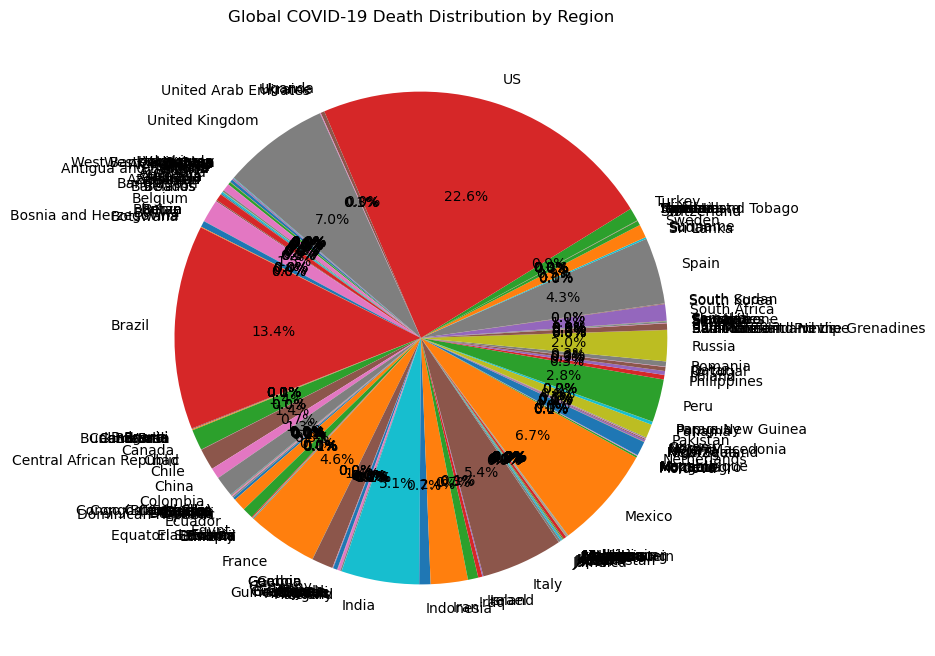

In [ ]:
death_df = df.groupby('Country/Region')['Deaths'].sum()

plt.figure(figsize=(8,8))
plt.pie(death_df, labels=death_df.index, autopct='%1.1f%%', startangle=140)
plt.title("Global COVID-19 Death Distribution by Region")
plt.show()

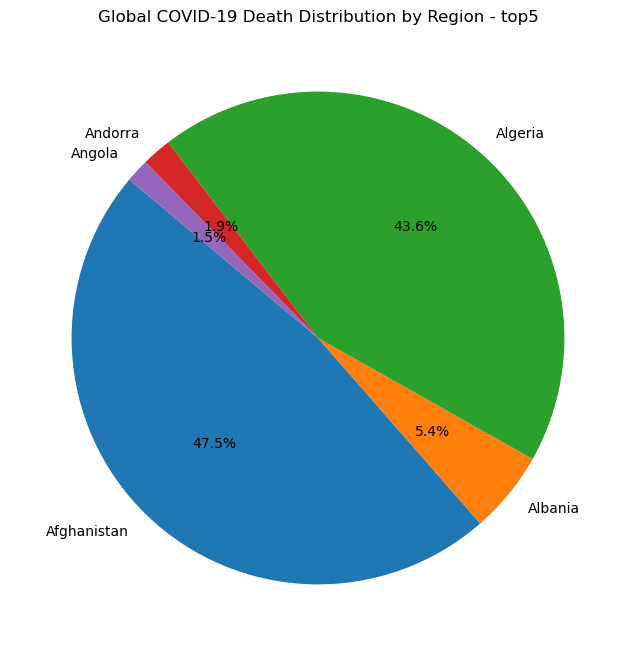

In [14]:
top = death_df.head(5)
plt.figure(figsize=(8,8))
plt.pie(top, labels=top.index, autopct='%1.1f%%', startangle=140)
plt.title("Global COVID-19 Death Distribution by Region - top5")
plt.show()

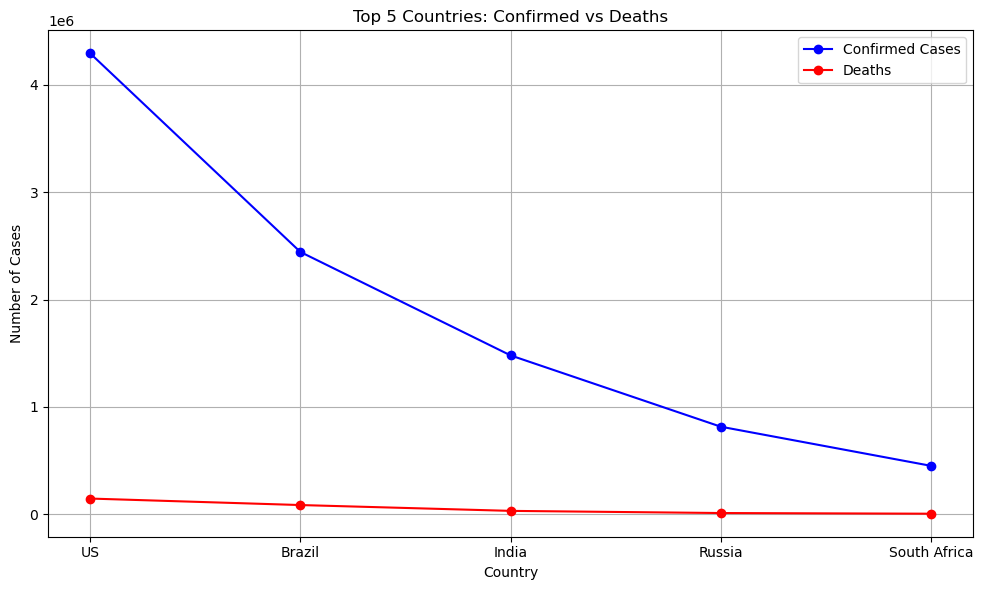

In [15]:
top5 = df.sort_values(by='Confirmed', ascending=False).head(5)

top5 = top5.set_index('Country/Region')

plt.figure(figsize=(10,6))
plt.plot(top5.index, top5['Confirmed'], marker='o', label='Confirmed Cases', color='blue')
plt.plot(top5.index, top5['Deaths'], marker='o', label='Deaths', color='red')
plt.title("Top 5 Countries: Confirmed vs Deaths")
plt.xlabel("Country")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

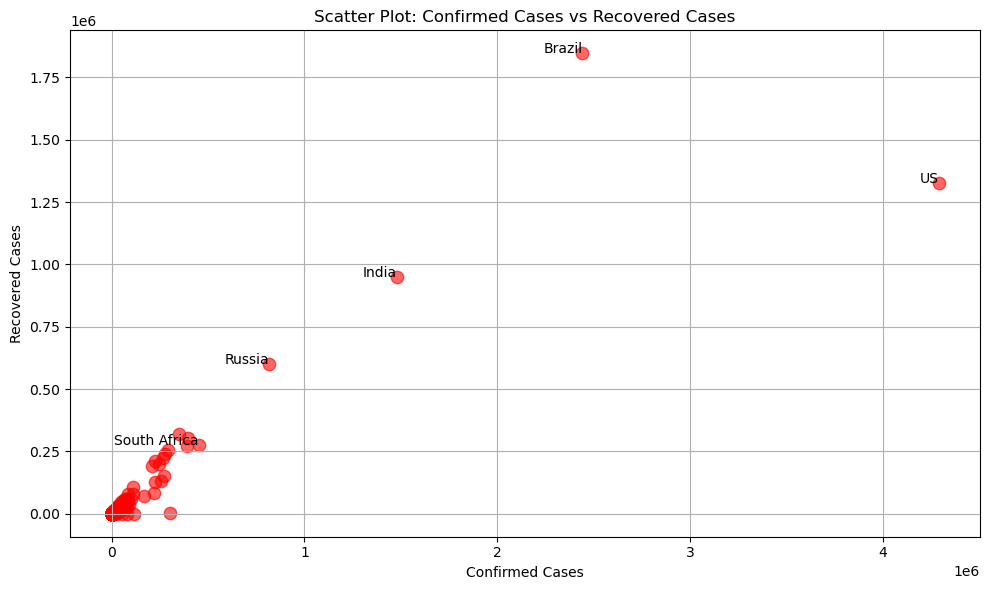

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(df['Confirmed'], df['Recovered'], color='red', alpha=0.6, s=80)

top_countries = df.sort_values(by='Confirmed', ascending=False).head(5)
for i, row in top_countries.iterrows():
    plt.text(row['Confirmed'], row['Recovered'], row['Country/Region'], fontsize=10, ha='right')

plt.title("Scatter Plot: Confirmed Cases vs Recovered Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Recovered Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

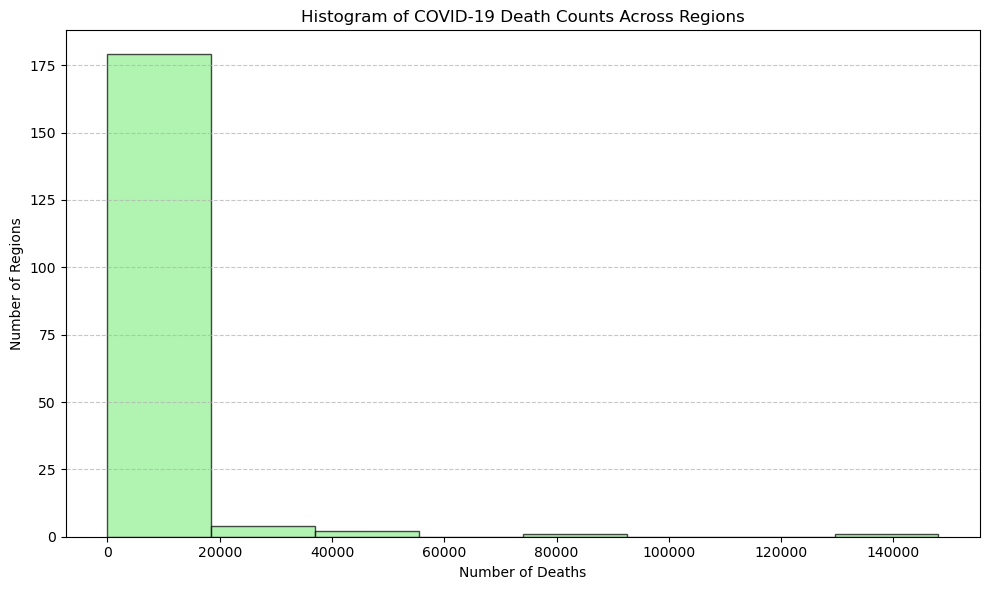

In [19]:
plt.figure(figsize=(10,6))
plt.hist(death_df, bins=8, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Histogram of COVID-19 Death Counts Across Regions")
plt.xlabel("Number of Deaths")
plt.ylabel("Number of Regions")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

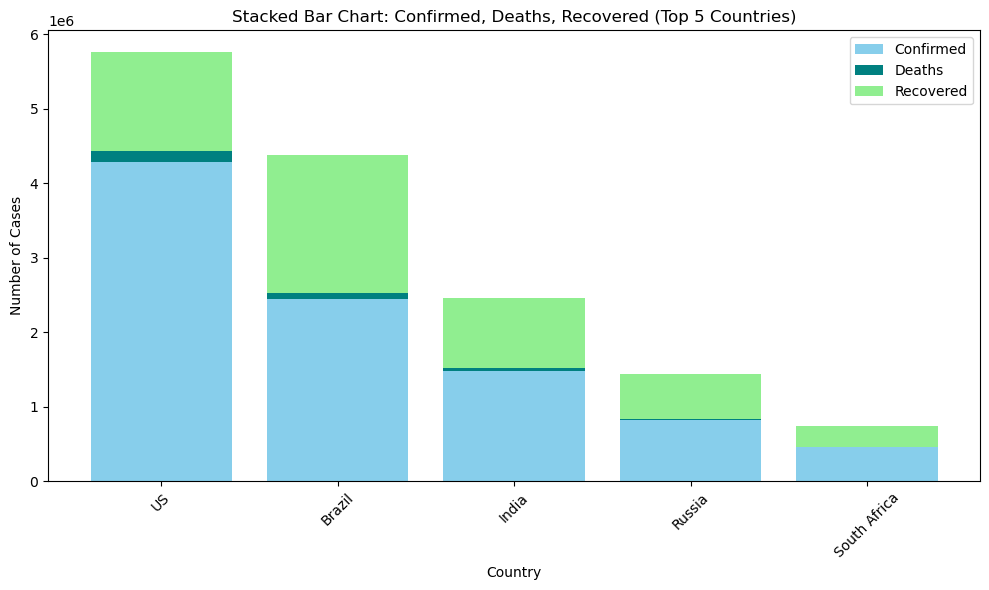

In [23]:
plt.figure(figsize=(10,6))
plt.bar(top5.index, top5['Confirmed'], label='Confirmed', color='skyblue')
plt.bar(top5.index, top5['Deaths'], bottom=top5['Confirmed'], label='Deaths', color='teal')
plt.bar(top5.index, top5['Recovered'], bottom=top5['Confirmed'] + top5['Deaths'], label='Recovered', color='lightgreen')

plt.title("Stacked Bar Chart: Confirmed, Deaths, Recovered (Top 5 Countries)")
plt.ylabel("Number of Cases")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

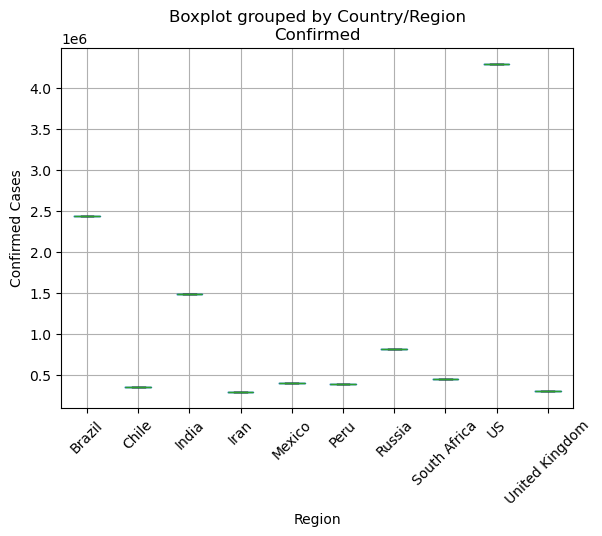

In [35]:
top10 = df.sort_values(by='Confirmed', ascending=False).head(10)
plt.figure(figsize=(12,6))
top10.boxplot(column='Confirmed', by='Country/Region', grid=True)
plt.xlabel("Region")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.show()

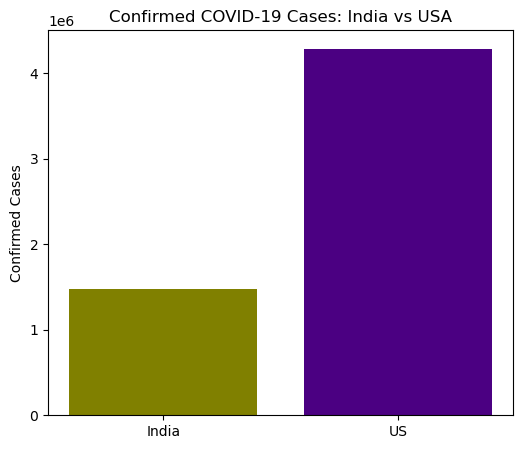

In [52]:
countries = ['India', 'US']
df_countries = df[df['Country/Region'].isin(countries)]

ind = df_countries[df_countries['Country/Region'] == 'India']['Confirmed'].values
us = df_countries[df_countries['Country/Region'] == 'US']['Confirmed'].values
values = [ind[0], us[0]]
x = [0, 0.5]
plt.figure(figsize=(6,5))
plt.bar(x, values, width=0.4, color=['olive','indigo'])
plt.xticks([0, 0.5], countries)
plt.ylabel("Confirmed Cases")
plt.title("Confirmed COVID-19 Cases: India vs USA")
plt.show()